
起止时间：2020-01-06 - 2021-01-20
调仓周期：每日调仓
参考基准：000905.SH
回测因子：alpha_1_factor

正在进行分组回测...

loading dailyreturn time cost 1.56s
加载中: alpha_1_factor
loading alpha_1_factor time cost 0.97s
因子加载完成
begin group: 1
begin group: 2
begin group: 3
begin group: 4
begin group: 5
begin group: 6
begin group: 7
begin group: 8
begin group: 9
begin group: 10


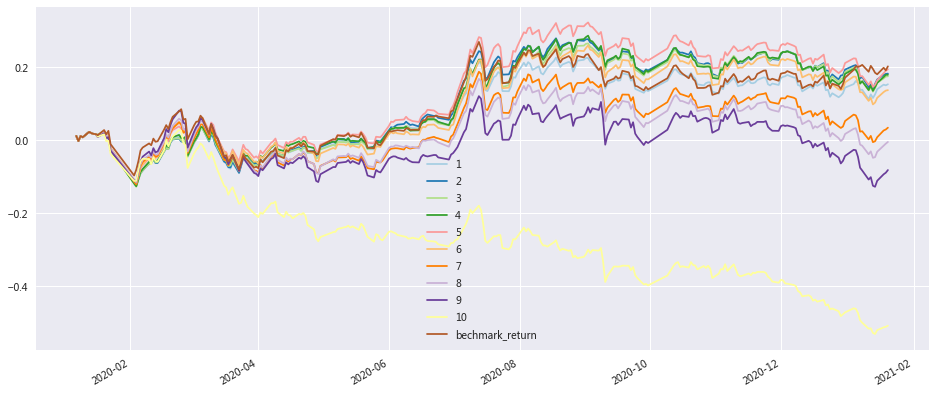

各个分组相对于基准的收益：


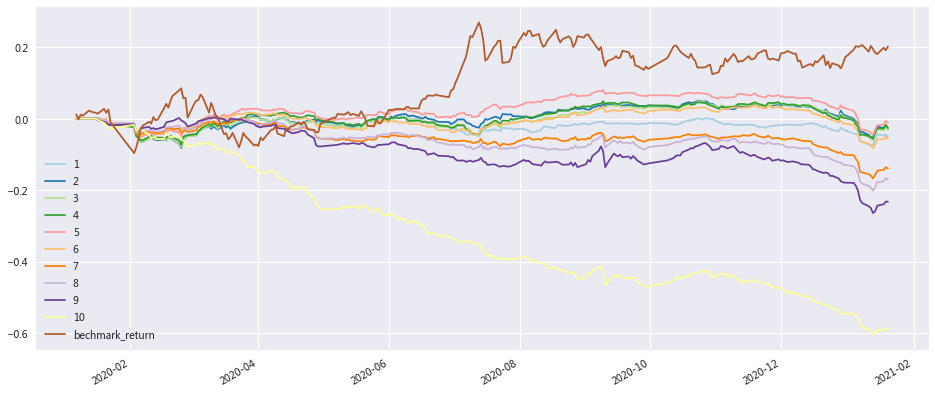

最高分位数的收益减去最低分位数的收益曲线：


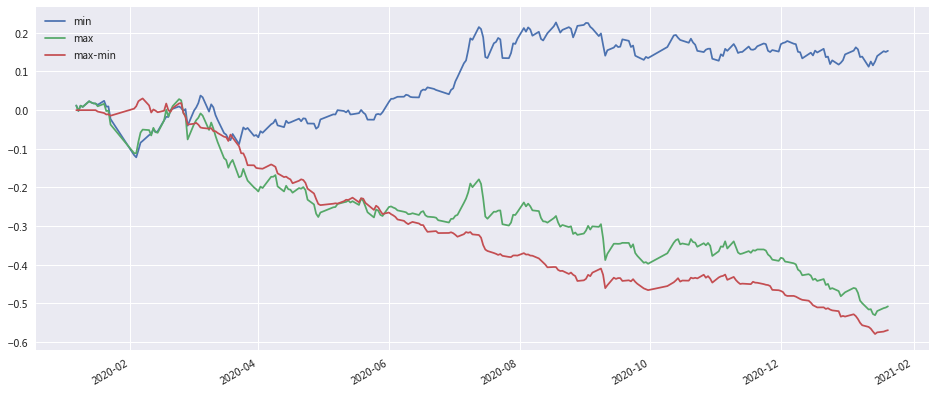

各个分组的累积收益：


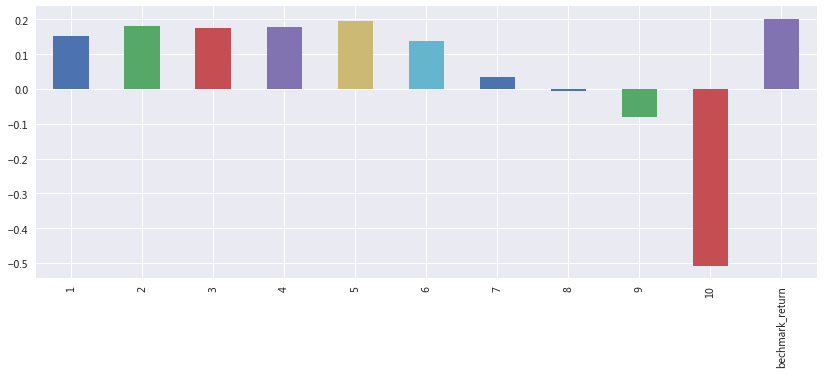

In [1]:

%matplotlib inline
from smartbeta.backtest.group_factor_backtest import GroupFactorBackTest
import time
import sys

#接收前端传入参数
# bt_name = 'bt_name'
start = '2020-01-06'
end = '2021-01-20'
freqValue = 'daily'
benchmark= '000905.SH'
group = 10
factor_name = 'alpha_1_factor'
name = 'alpha_1_factor'
factor_timeperiod = ''

startDate = start.replace('-', '')
endDate = end.replace('-', '')

if factor_timeperiod == '':
    factor_timeperiod = 22

freq = freqValue
if freq == 'daily':
    freq ='每日调仓'
elif freq == 'week_end':
    freq = '每周调仓'
else:
    freq = '每月调仓'

print('')
# print('回测名称：' + str(bt_name))
print('起止时间：' + str(start) + ' - ' + str(end))
print('调仓周期：' + str(freq))
print('参考基准：' + str(benchmark))
print('回测因子：' + str(name))
print('')
print('正在进行分组回测...')
print('')

if factor_timeperiod == '':
    factors = [{'name': factor_name, 'direction': -1}]
else: 
    factor_timeperiod = int(factor_timeperiod)
    factors = [{'name': factor_name, 'direction': -1, 'factor_parameters':{'timeperiod': factor_timeperiod}}]

bt = GroupFactorBackTest(benchmark, startDate, endDate, factors, group=group, freq=freqValue)

bt.set_buy_limit_down(False)
bt.run()
bt.analy_plot()

print("各个分组相对于基准的收益：")
bt.relative_bech_ret_plot()

print("最高分位数的收益减去最低分位数的收益曲线：")
bt.max_min_ret_plot()

print("各个分组的累积收益：")
bt.cum_return_plot_bar()
